# Exercise 01: The First Step with PyTorch

In this exercise, you will learn how to explore data with the commonly used library – PyTorch.
You will conduct several simple analyses and visualizations on the CIFAR-10 dataset, which is
a popular dataset for multi-class classification.

In [61]:
from imbalance_data.cifar10Imbanlance import Cifar10Imbanlance
import warnings
warnings.filterwarnings("ignore")
import torch
import matplotlib.pyplot as plt
import numpy as np
import  torchvision.transforms as transforms

## Imbanlanced CIFAR-10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The CIFAR10-LT is a long-tailed version of the CIFAR10 dataset, where some classes have a
disproportionately higher number of instances than others. There we will generate an long-tailed dataset from CIFAR-10 by ``Cifar10Imbanlance`` class.

Generate an imbanlanced dataset 

In [62]:
imbanlance_rate = 0.1
# the dataset directory
root = "/shareddata/"
trainset = Cifar10Imbanlance(imbanlance_rate, transform=transforms.ToTensor(), train=True, file_path=root)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)


Files already downloaded and verified


Labels of Cifar10 are below.

In [63]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

There we define a function called ``plot_cifar10``, which can plot ten pictures from a given batch.

In [64]:

def plot_cifar10(images,labels):
    plt.figure(figsize=(15, 6))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        image = images[i].numpy()
        label = labels[i].item()
        plt.imshow(np.transpose(image, (1, 2, 0)))
        plt.title(class_names[label])
        plt.axis('off')

    plt.show()

Plot CIFAR-10 data set images and corresponding labels.

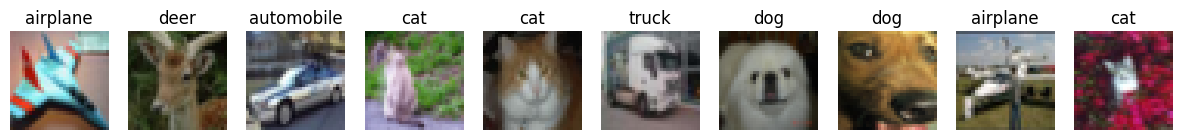

In [65]:
# Creat an iterator object `dataiter` from the `train_dataloader`
# then use the `next()` function to get the next batch of images and labels from the iterator. 
# This allows us to access the data in batches for training or evaluation purposes.
dataiter = iter(train_dataloader)
images, labels = next(dataiter)
plot_cifar10(images,labels)

## Exercise

---

### Task 1: class prior estimation
Please denfine a function named ``count_class_instances`` that takes a dataloader as input and obtains the **sample size of each class** in this
dataset. It returns a tensor containing the count of each class.

In [66]:
def count_class_instances(train_dataloader):
    # write your code there
    class_counts = torch.zeros(10)
    dataiter = iter(train_dataloader)
    images, labels = next(dataiter)
    for i in labels:
        class_counts[i] = class_counts[i] + 1
    # The output of the function should be a tensor that contains the sample size of each class.
    # class_counts is an tensors with shape torch.Size([10])
    return class_counts

Then we calculate and display the number of samples or instances for each class using the ``count_class_instances`` function. 

In [67]:
class_counts = count_class_instances(train_dataloader)

for i, count in enumerate(class_counts):
    print(f"{class_names[i]}: {int(count)} samples")

airplane: 32 samples
automobile: 22 samples
bird: 21 samples
cat: 15 samples
deer: 12 samples
dog: 9 samples
frog: 4 samples
horse: 8 samples
ship: 4 samples
truck: 1 samples


---
### Task 2: dataset statistics calculation

Please denfine a function named ``compute_channel_mean_std``, which iscalculates the channel-wise mean (mu, $\mu$) and standard deviation (std, $\sigma$). It takes a dataloader as input.



In [68]:
def compute_channel_mean_std(train_dataloader):
    
    channel_means = [torch.Tensor()] * 3
    channel_stds = [torch.Tensor()] * 3
    dataiter = iter(train_dataloader)
    images, labels = next(dataiter)
    
    for image in images:
        # Split the image into its three channels: R, G, B
        red_channel = image[0, :, :]
        green_channel = image[1, :, :]
        blue_channel = image[2, :, :]

        # Calculate the mean and standard deviation for each channel
        channel_means[0] = torch.cat((channel_means[0], red_channel.flatten()))
        channel_means[1] = torch.cat((channel_means[1], green_channel.flatten()))
        channel_means[2] = torch.cat((channel_means[2], blue_channel.flatten()))

    # Calculate the mean and standard deviation for each channel
    mu = [channel.mean().item() for channel in channel_means]
    std = [channel.std().item() for channel in channel_means]
    
    # The outputs of the function should be two tensors: mu and std, which contain three values corresponding to the three channels.
    # channel_means, channel_stddevs are tensors with shape torch.Size([3])
    return torch.Tensor(mu), torch.Tensor(std)


There we print means and deviations for each channels.

In [69]:
channel_means, channel_stddevs = compute_channel_mean_std(train_dataloader)
print("Channel means:", channel_means)
print("Channel standard deviations:", channel_stddevs)

Channel means: tensor([0.4986, 0.5013, 0.4913])
Channel standard deviations: tensor([0.2509, 0.2542, 0.2776])


Then we plot normalized images with corresponding labels.

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

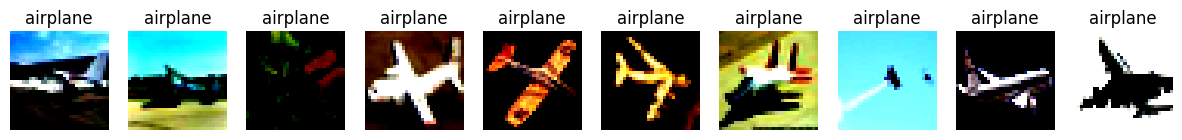

In [70]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean = channel_means, std = channel_stddevs)])
trainset_normalize = Cifar10Imbanlance(imbanlance_rate, transform=transform, train=True, file_path=root)
train_normalize_dataloader = torch.utils.data.DataLoader(trainset_normalize, batch_size=128, shuffle=False)
dataiter = iter(train_normalize_dataloader)
images, labels = next(dataiter)
plot_cifar10(images,labels)